In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Canarias'

link = 'https://rally-base.com/2023/rally-islas-canarias-2023/?ssId='
startat, no_ss=7503, int(13) # starting number of url, count of Special Stages
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,1,Paddon Ha,RC2,00:01:39.8,67.82 0.00,00:00:00.0 00:00:00.0,1,Canarias,1
2,2,24,Nucita An,RC2,00:01:40.2,67.54 0.21,00:00:00.4 00:00:00.4,1,Canarias,2
3,3,18,Wagner Si,RC2,00:01:40.5,67.34 0.37,00:00:00.7 00:00:00.3,1,Canarias,3
4,4,17,Mareš Fil,RC2,00:01:41.0,67.01 0.64,00:00:01.2 00:00:00.5,1,Canarias,4
5,5,39,Pernía S.,RC2,00:01:41.1,66.94 0.69,00:00:01.3 00:00:00.1,1,Canarias,5
...,...,...,...,...,...,...,...,...,...,...
46,46,60,Concepción,RC5,00:09:24.9,82.83 7.55,00:01:38.2 00:00:02.1,13,Canarias,46
47,47,59,Avella Ul,RC5,00:09:28.4,82.33 7.82,00:01:41.7 00:00:03.5,13,Canarias,47
48,48,34,Grillo A.,RC4,00:09:37.5,81.03 8.52,00:01:50.8 00:00:09.1,13,Canarias,48
49,49,45,de la Cruz,RC4,00:10:30.8,74.19 12.62,00:02:44.1 00:00:53.3,13,Canarias,49


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [7]:

rally2023_ClassView2

0                             Pos.                                          \
ss                              1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                    
1   Paddon  Ha RC2   Canarias    1  18   2   2   8   3   1   2   5   2   4   
2   Østberg  M RC2   Canarias    9   3  39  38   6  17  16  11   2   4  23   
3   Llarena  E RC2   Canarias   16   2   3  10   4   9   8  10  10   9  11   
4   Kristensso RC2   Canarias   10  29  22  18  17  20  19  19   6   6  17   
5   Mabellini  RC2   Canarias   13  16  16  13   9  11  13  18  26   7   1   
6   Bonato  Yo RC2   Canarias   12  17   1   1   1   1   2   1   1   1   2   
7   Heikkilä   RC2   Canarias   19  22  20  21  20  22  15  14  20  12  19   
8   Csomós  Mi RC2   Canarias   17  26   8   -   -   -   -   -   -   -   -   
9   Sesks  M.  RC2   Canarias   14   8  19  20  16  23  20  13   7  14  14   
10  Franceschi RC2   Canarias   19   5   7  16   4   6   6  15  13   7   8   
11  Pardo  Jav RC2   Canarias   21   7  11   7  18  12   4   6  43   -   -   
12  Suárez  J. RC2   Canarias   29  15   6   9   2   8  14   2   4  23   7   
14  Palomo  Ós RC2   Canarias   24  10  23  23  22  18  22  23  16  17  22   
15  Ruiloba  D RC2   Canarias   22  20   9  11  13   2   5  12  24  18  21   
16  Campedelli RC2   Canarias   11  30   5   5   3   5   9   5  17   5   3   
17  Mareš  Fil RC2   Canarias    4  28  14  15  11  14  10  21  10  21  12   
18  Wagner  Si RC2   Canarias    3  20  18  19  10  14  21   4  12  13   5   
19  Suarez  M. RC2   Canarias   23  23  10   3  19  16  17  20  23  19  16   
20  Černý  Jan RC2   Canarias   14   9  17  14  21  18  18  16  18  15  15   
21  Cruz  Enri RC2   Canarias   28   6  13   8  55  56  54   -   -   -   -   
22  Grzyb  Grz RC2   Canarias    6  24  15  17  13  10  12   8   9  20  10   
23  László  Ma RC2   Canarias    8  12  21  22  23  21  23  22   8  16  20   
24  Nucita  An RC2   Canarias    2   4  12  12  12  13  11  17  15  11  13   
25  Kołtun  J. RC2   Canarias   25  19  25  25  27  27  54  27  27  27  25   
26  Cuzma  Bog RC2   Canarias   57  41  40  43  35  39  37  35  33  38  37   
27  Allen  Phi RC2   Canarias   60   -   -   -   -   -   -   -   -   -   -   
28  Somaschini RC2   Canarias   33  43  31  35  33  35  32  34  28  35  28   
29  Bertolotti RC2   Canarias   60  42  33  31  40  34  34  36  36  29  27   
35  Ares  Iván RC2   Canarias   17  11   4   4  13   3   6   9  14   3   5   
36  Solans  Ja RC2   Canarias    7   1  37   6   7   7   3   7   3  10   9   
37  Peláez  J. RC2   Canarias   32  31  27  27  26  25  26  28  25  26  32   
38  Comas  Mar RC2   Canarias   34  36  41  39  39  41  40  43  35  32  36   
39  Pernía  S. RC2   Canarias    5  38  59  58  57  57  54   -   -   -   -   
40  López  F.  RC2   Canarias   30  27  28  29  29  28  28  33  29  30  39   
41  Fuentes  S RC2   Canarias   26  14  26  28  25  26  25  24  21  23  26   
42  Quesada  R RC2   Canarias   38  13  24  24  24  24  24  25  19  22  18   

0                                      
ss                             12  13  
No. Crew       Group Race              
1   Paddon  Ha RC2   Canarias   8  11  
2   Østberg  M RC2   Canarias   5  15  
3   Llarena  E RC2   Canarias   6   9  
4   Kristensso RC2   Canarias  11   8  
5   Mabellini  RC2   Canarias  14   1  
6   Bonato  Yo RC2   Canarias   3  10  
7   Heikkilä   RC2   Canarias  20  33  
8   Csomós  Mi RC2   Canarias   -   -  
9   Sesks  M.  RC2   Canarias   9   5  
10  Franceschi RC2   Canarias  10  17  
11  Pardo  Jav RC2   Canarias   -   -  
12  Suárez  J. RC2   Canarias  16   7  
14  Palomo  Ós RC2   Canarias  13   -  
15  Ruiloba  D RC2   Canarias   -   -  
16  Campedelli RC2   Canarias   7   -  
17  Mareš  Fil RC2   Canarias  15   6  
18  Wagner  Si RC2   Canarias   2   2  
19  Suarez  M. RC2   Canarias  19  13  
20  Černý  Jan RC2   Canarias  22  18  
21  Cruz  Enri RC2   Canarias   -   -  
22  Grzyb  Grz RC2   Canarias  21   4

In [8]:
rally2023_ClassView

0                             Pos.                                          \
ss                              1   2   3   4   5   6   7   8   9   10  11   
No. Crew       Group Race                                                    
1   Paddon  Ha RC2   Canarias    1  18   2   2   8   3   1   2   5   2   4   
2   Østberg  M RC2   Canarias    9   3  39  38   6  17  16  11   2   4  23   
3   Llarena  E RC2   Canarias   16   2   3  10   4   9   8  10  10   9  11   
4   Kristensso RC2   Canarias   10  29  22  18  17  20  19  19   6   6  17   
5   Mabellini  RC2   Canarias   13  16  16  13   9  11  13  18  26   7   1   
...                            ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
58  Mederos  H RC5   Canarias   49  51  50  49  47  47  45  51  45  46  45   
59  Avella  Ul RC5   Canarias   51  53  49  50  58  58  57  47  53  52  47   
60  Concepción RC5   Canarias   53  57  56  53  51  52  49  52  52  49  50   
61  Naranjo  M RC4   Canarias   59  59  58  57  56  55  53  56  55  54  53   
62  Bello  Jos RC4   Canarias   46  45  44  46  42  44  43  40  42  43  41   

0                                      
ss                             12  13  
No. Crew       Group Race              
1   Paddon  Ha RC2   Canarias   8  11  
2   Østberg  M RC2   Canarias   5  15  
3   Llarena  E RC2   Canarias   6   9  
4   Kristensso RC2   Canarias  11   8  
5   Mabellini  RC2   Canarias  14   1  
...                            ..  ..  
58  Mederos  H RC5   Canarias  43  36  
59  Avella  Ul RC5   Canarias  49  47  
60  Concepción RC5   Canarias  48  46  
61  Naranjo  M RC4   Canarias  52  50  
62  Bello  Jos RC4   Canarias  40  38  

[61 rows x 13 columns]

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,1,Paddon Ha,RC2,1,Canarias,1,99.8
2,24,Nucita An,RC2,1,Canarias,2,100.2
3,18,Wagner Si,RC2,1,Canarias,3,100.5
4,17,Mareš Fil,RC2,1,Canarias,4,101.0
5,39,Pernía S.,RC2,1,Canarias,5,101.1
...,...,...,...,...,...,...,...
46,60,Concepción,RC5,13,Canarias,46,564.9
47,59,Avella Ul,RC5,13,Canarias,47,568.4
48,34,Grillo A.,RC4,13,Canarias,48,577.5
49,45,de la Cruz,RC4,13,Canarias,49,630.8


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race     ss          
Canarias 1       99.8
         2      535.7
         3      366.0
         4      673.7
         5      526.4
         6      367.9
         7      673.9
         8      296.0
         9     1046.6
         10     467.5
         11     295.7
         12    1038.8
         13     466.7

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8
...,...,...,...,...,...,...,...,...
732,60,Concepción,RC5,13,Canarias,46,564.9,466.7
733,59,Avella Ul,RC5,13,Canarias,47,568.4,466.7
734,34,Grillo A.,RC4,13,Canarias,48,577.5,466.7
735,45,de la Cruz,RC4,13,Canarias,49,630.8,466.7


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8,0.0,0.000000,01
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8,0.4,0.400802,01
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8,0.7,0.701403,01
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8,1.2,1.202405,01
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8,1.3,1.302605,01
...,...,...,...,...,...,...,...,...,...,...,...
732,60,Concepción,RC5,13,Canarias,46,564.9,466.7,98.2,21.041354,13
733,59,Avella Ul,RC5,13,Canarias,47,568.4,466.7,101.7,21.791301,13
734,34,Grillo A.,RC4,13,Canarias,48,577.5,466.7,110.8,23.741161,13
735,45,de la Cruz,RC4,13,Canarias,49,630.8,466.7,164.1,35.161774,13


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC2')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8,0.0,0.000000,01
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8,0.4,0.400802,01
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8,0.7,0.701403,01
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8,1.2,1.202405,01
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8,1.3,1.302605,01
...,...,...,...,...,...,...,...,...,...,...,...
715,40,López F.,RC2,13,Canarias,29,516.0,466.7,49.3,10.563531,13
716,28,Somaschini,RC2,13,Canarias,30,516.5,466.7,49.8,10.670666,13
719,7,Heikkilä,RC2,13,Canarias,33,523.8,466.7,57.1,12.234840,13
725,37,Peláez J.,RC2,13,Canarias,39,535.8,466.7,69.1,14.806085,13


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,1,Paddon Ha,RC2,1,Canarias,1,99.8,99.8,0.0,0.000000,01
1,24,Nucita An,RC2,1,Canarias,2,100.2,99.8,0.4,0.400802,01
2,18,Wagner Si,RC2,1,Canarias,3,100.5,99.8,0.7,0.701403,01
3,17,Mareš Fil,RC2,1,Canarias,4,101.0,99.8,1.2,1.202405,01
4,39,Pernía S.,RC2,1,Canarias,5,101.1,99.8,1.3,1.302605,01
...,...,...,...,...,...,...,...,...,...,...,...
715,40,López F.,RC2,13,Canarias,29,516.0,466.7,49.3,10.563531,13
716,28,Somaschini,RC2,13,Canarias,30,516.5,466.7,49.8,10.670666,13
719,7,Heikkilä,RC2,13,Canarias,33,523.8,466.7,57.1,12.234840,13
725,37,Peláez J.,RC2,13,Canarias,39,535.8,466.7,69.1,14.806085,13


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Canarias                                                        \
SS.              01    02     03     04     05     06     07    08     09   
Crew                                                                        
Allen  Phi    600.0   NaN    NaN    NaN    NaN    NaN    NaN   NaN    NaN   
Ares  Iván      3.2  20.1    5.6   10.9    7.7    1.7    8.1   5.2   24.9   
Bertolotti    600.0  50.0   31.6   59.1   56.1   28.9   61.9  62.8   92.6   
Bonato  Yo      2.5  23.1    0.0    0.0    0.0    0.0    0.2   0.0    0.0   
Campedelli      2.0  35.4    6.3   11.4    2.6    1.9    9.9   4.1   32.1   
Comas  Mar     12.5  43.8   39.7   72.2   55.4   39.2   75.9  73.3   90.9   
Cruz  Enri      9.4   8.5    8.6   12.8  232.9  165.5  600.0   NaN    NaN   
Csomós  Mi      3.2  29.1    7.2    NaN    NaN    NaN    NaN   NaN    NaN   
Cuzma  Bog     29.6  49.3   39.4   83.2   48.0   33.3   69.7  61.5   88.7   
Franceschi      4.1   7.3    7.0   17.5    3.0    2.3    8.1   6.8   24.7   
Fuentes  S      7.8  21.1   22.5   45.4   19.9   15.0   30.8  14.1   43.2   
Grzyb  Grz      1.4  27.2    8.8   18.3    7.7    4.1   10.5   5.1   23.0   
Heikkilä        4.1  25.1   12.4   21.5   10.3    8.8   12.6   6.6   41.3   
Kołtun  J.      7.6  24.1   17.9   36.9   24.7   17.6  600.0  22.8   66.0   
Kristensso      1.9  33.3   12.9   18.6    8.0    7.8   14.7   7.2   20.4   
Llarena  E      3.0   2.3    5.0   14.6    3.0    3.1    9.0   5.4   23.2   
László  Ma      1.6  20.2   12.7   23.4   13.6    8.2   19.3   8.2   21.9   
López  F.      11.1  32.1   27.9   57.0   34.7   21.0   49.5  33.8   74.5   
Mabellini       2.7  22.4    9.1   16.0    4.1    4.2   11.3   7.1   56.8   
Mareš  Fil      1.2  33.1    8.7   17.2    6.6    5.0   10.0   7.4   23.2   
Nucita  An      0.4   5.8    8.5   15.9    7.2    4.9   10.4   7.0   27.4   
Paddon  Ha      0.0  23.5    4.6    3.0    4.0    1.7    0.0   1.8   19.4   
Palomo  Ós      7.1  18.9   13.8   26.8   10.6    6.5   17.1  12.2   27.8   
Pardo  Jav      4.4  13.2    8.0   12.1    8.5    4.4    6.6   4.2  163.4   
Peláez  J.     11.4  40.5   24.2   43.5   23.9   13.8   31.7  23.1   56.4   
Pernía  S.      1.3  45.5  600.0  600.0  600.0  600.0  600.0   NaN    NaN   
Quesada  R     16.2  20.6   15.8   30.9   19.4   11.2   30.1  16.9   40.8   
Ruiloba  D      5.9  24.3    7.5   14.9    7.7    1.0    7.2   5.8   54.7   
Sesks  M.       2.8  13.4   12.3   20.0    7.8    8.9   15.4   6.0   20.7   
Solans  Ja      1.5   0.0   34.2   11.9    3.9    2.7    4.6   4.4   14.1   
Somaschini     12.3  52.5   30.0   65.9   45.5   29.0   61.1  46.6   70.3   
Suarez  M.      6.2  26.6    7.8   10.5    9.9    6.2   13.6   7.3   54.1   
Suárez  J.     11.0  22.1    6.9   14.5    1.6    2.9   11.5   1.8   15.6   
Wagner  Si      0.7  24.3   11.9   19.0    6.2    5.0   16.3   3.2   24.3   
Østberg  M      1.7   4.5   37.7   72.1    3.6    6.4   13.4   5.6   11.3   
Černý  Jan      2.8  16.4    9.5   16.4   10.5    6.5   13.7   6.9   39.7   

Race                                 
SS.           10    11     12    13  
Crew                                 
Allen  Phi   NaN   NaN    NaN   NaN  
Ares  Iván   3.0   1.5    5.5  21.3  
Bertolotti  34.9  25.5  107.6  74.4  
Bonato  Yo   0.0   0.3    3.7  11.3  
Campedelli   3.6   0.9    8.9   NaN  
Comas  Mar  40.1  33.8  103.3  47.9  
Cruz  Enri   NaN   NaN    NaN   NaN  
Csomós  Mi   NaN   NaN    NaN   NaN  
Cuzma  Bog  46.2  34.1   86.9  45.8  
Franceschi   5.4   2.1   12.8  34.5  
Fuentes  S  19.2  25.3   45.0  39.8  
Grzyb  Grz  11.6   2.4   30.7   3.2  
Heikkilä     7.1  12.5   29.8  57.1  
Kołtun  J.  25.3  23.2   48.0  41.7  
Kristensso   4.3   8.8   14.6   9.2  
Llarena  E   5.7   2.7    6.4  10.3  
László  Ma   9.6  12.8   15.1  37.8  
López  F.   36.3  37.4   77.0  49.3  
Mabellini    5.4   0.0   19.4   0.0  
Mareš  Fil  16.3   3.0   19.6   5.8  
Nucita  An   7.0   3.3   25.5   2.7  
Paddon  Ha   2.1   1.1   11.5  15.3  
Palomo  Ós  10.3  15.4   16.4   NaN  
Pardo  J

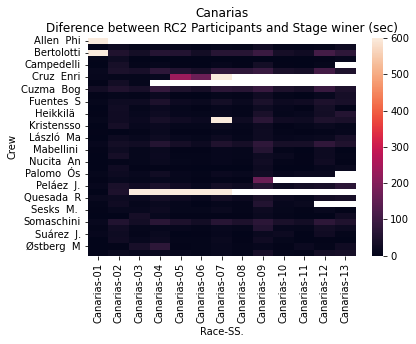

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC2 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

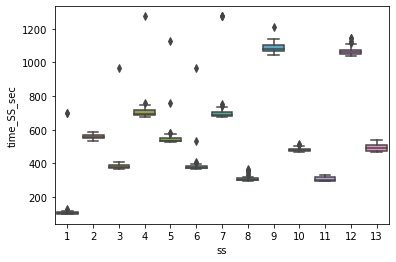

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

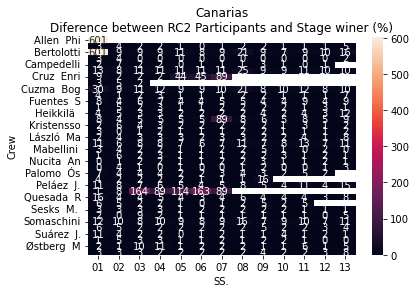

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC2 Participants and Stage winer (%)')
plt.savefig("Rc2.jpg")